In [ ]:
!pip install pint

In [ ]:
import pint

"What is the density of the air in the room?"

To answer this question, let's model with use of a state equation: ideal gas law.

$$ pV = NRT, $$
where $R = kN_A$.

$$ p = \rho R'T, $$
where $\frac{R}{M}$.

Data:

- $\rho = 1000$ hPa



In [ ]:
si = pint.UnitRegistry()  # registry with SI units

p = 1000 * si.hPa
print(p)
print(p.__class__)

print(p + 3 * si.N / si.cm**2)
# print(p - 4 * si.J / si.m**2)  # raises DimensionalityError

1000 hectopascal
<class 'pint.Quantity'>
1300.0 hectopascal


In [ ]:
import scipy.constants

assert scipy.constants.R == scipy.constants.gas_constant

R = scipy.constants.R * si.joule / (si.mol * si.K)
print(R)

M = 28.96 * si.g / si.mol
print(M)

8.314462618 joule / kelvin / mole
28.96 gram / mole


$$ \rho = \frac{p}{R'T} = \frac{p}{\frac{R}{M}T} $$

In [ ]:
def density(temperature, pressure):
    R_prime = R / M
    return pressure / (R_prime * temperature)

T = (17 + scipy.constants.zero_Celsius) * si.K
print(T)

rho = density(T, p)
print(rho)
print(rho.check("[density]"))
print(rho.check("[speed]"))

rho = rho.to_base_units()
print(f"{rho=:.3g}")

290.15 kelvin
12.004437022579845 gram * hectopascal / joule
True
False
rho=1.2 kilogram / meter ** 3


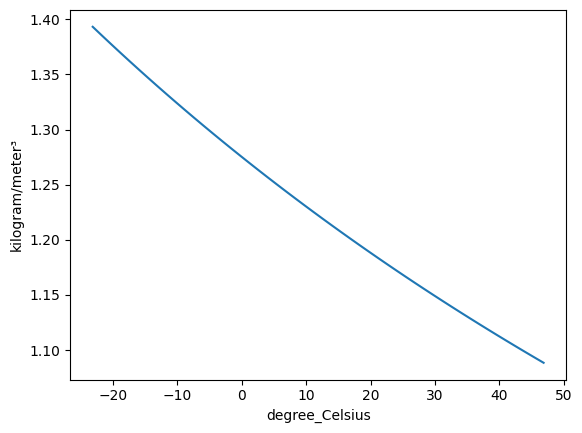

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

si.setup_matplotlib()

temperatures = np.linspace(250, 320) * si.K

plt.plot(temperatures, density(temperatures, p))
plt.gca().xaxis.set_units(si.degC)
plt.gca().yaxis.set_units(si.kg / si.m**3)
plt.show()

In [ ]:
(1 * si.pint).to_base_units()

<Quantity(0.000473176473, 'meter ** 3')>

Homeworks:
- 7 times
- 60% of the overall grade
- a two week window
- the extension of the lab work
- the submission by email with a single link to a GitHub repository
- a GitHub action script inside the repo that compiles to a pdf report
- all graphics must be vector graphics